# Recall 

## <ul> <li>confusion matrix </li> <li>positive case </li><li>accuracy / sensitivity </li></ul>


In [6]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# The Iris Dataset 

## The Iris dataset has four features <BR> In the target, three categories (type of flower)

## When we plot them on a graph, records from <BR>each category seem to be near each other.

I chose the Iris dataset to illustrate this because the groupings are really obvious.

In [15]:
bunchobject = load_iris()

#print(bunchobject.DESCR)

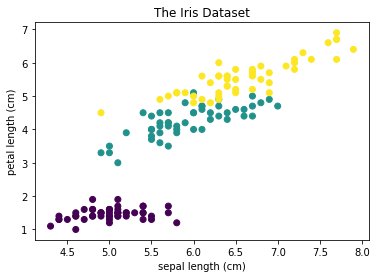

In [7]:

feature_index = [0,2]
my_data = bunchobject.data[:,feature_index]
''' the colours are according to the category'''
plt.scatter(my_data[:,0],my_data[:,1],c=bunchobject.target)
my_x = bunchobject.feature_names[0]
my_y = bunchobject.feature_names[2]
plt.xlabel(my_x)
plt.ylabel(my_y)
plt.title('The Iris Dataset')
plt.show()

# The k-Nearest Neighbours model (kNN)

## So it would seem that if we had a new record to classify, <BR>  we can compare it against its neighbours <BR> and use the classification of its neighbours.

## This is the intuition behind the k-Nearest Neighbours model

## <font color = 'blue'> The classification of an (unknown) record is determined by <br>the majority of the classifications of its <font color = 'red'> k </font> nearest neighbours.</font>

## Let's begin. Put your code for get_metrics and <BR>normalize_minmax in these cells.

In [13]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, label):
    c_matrix = confusion_matrix(actual_targets, predicted_targets, label)
    
    total = float(sum(sum(c_matrix)))
    correct_predicitons = float(c_matrix[0][0] + c_matrix[1][1])
    correct_positives = float(c_matrix[1][1])
    total_negatives = float(sum(c_matrix[0,:]))
    total_positives = float(sum(c_matrix[1,:]))
    false_positives = float(c_matrix[0][1])
    
    output = {
        'confusion matrix' : c_matrix,
        'total records' : int(total),
        'accuracy' : round(correct_predictions / total, 3),
        'sensitivity' : round(correct_positives / total_positives, 3),
        'false positive rate' : round(false_positives / total_negatives, 3)
    }
    return output

In [14]:
def normalize_minmax(data):
    size = data.shape
    if len(size) == 1:
        columns = 1
    else:
        columns = size[1]
        
    for i in range(columns):
        maxm = np.max(data[:, i])
        minm = np.min(data[:, i])
        denom = maxm - minm
        
        data[:,i] = (data[:, i] - minm)/denom
    return data


# The Python Code

## Load the data and select the features you want to include 

For now the selection of features is an arbitrary decision

In [21]:
import numpy as np
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

def get_metrics(actual_targets, predicted_targets, label):
    c_matrix = confusion_matrix(actual_targets, predicted_targets, label)
    
    total = float(sum(sum(c_matrix)))
    correct_predicitons = float(c_matrix[0][0] + c_matrix[1][1])
    correct_positives = float(c_matrix[1][1])
    total_negatives = float(sum(c_matrix[0,:]))
    total_positives = float(sum(c_matrix[1,:]))
    false_positives = float(c_matrix[0][1])
    
    output = {
        'confusion matrix' : c_matrix,
        'total records' : int(total),
        'accuracy' : round(correct_predictions / total, 3),
        'sensitivity' : round(correct_positives / total_positives, 3),
        'false positive rate' : round(false_positives / total_negatives, 3)
    }
    return output

def normalize_minmax(data):
    size = data.shape
    if len(size) == 1:
        columns = 1
    else:
        columns = size[1]
        
    for i in range(columns):
        maxm = np.max(data[:, i])
        minm = np.min(data[:, i])
        denom = maxm - minm
        
        data[:,i] = (data[:, i] - minm)/denom
    return data

feature_index = [0, 2]
bobj = load_iris()

def knn_classifier(bobj, feature_list, size, seed, k):
    data = bobj.data[:, feature_list]
    target = bobj.target
    
    data = normalize_minmax(data)
    
    X_train, X_test, y_train, y_train = train_test_split(data, target, size, seed)
    
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    
    predicted_targets = clf.predict(X_test)
    uniq, counts = np.unique(bobj.target,return_counts=True)
    
    results = get_metrics(y_test, predicted_targets, uniq)
    return results
results = knn_classifier(bobj, feature_index, 0.4, 42, 3)
print(results)

TypeError: Singleton array array(0.4) cannot be considered a valid collection.

## Normalize the data 

### Why normalize? The definition of "nearest" is by a distance measure 

### The default distance measure is the euclidean distance

For features $x$ and $y$, the "distance" $= \sqrt{ (x_1 - x_2)^2 + (y_1 - y_2)^2} $

### Any feature that has a larger order of magnitude will have a <BR>larger effect on this value. 

### Therefore we normalize to ensure that no single feature <BR>will dominate this calculation. 

## Split the data into the training and test set 

## Get an instance of the classifier and fit it to the training set

## The training set now becomes the nearest neighbours <BR> for the model to make predictions on the test set. 

## <font color = 'blue'> Your training set data IS the model</font>

## Arbitrarily select the value of <font color = 'red'> k </font> (for now)

## Make predictions on the test set 

## Generate the confusion matrix

# Actually, divide your dataset into three parts

## We need a validation process to select the value of <font color ='red'> k </font>

Because you arbitrarily selected it just now. How do you know it produces the best accuracy? 

## The sets are now <ul> <li> training set</li><li><font color='red'>validation set</font></li> <li>test set </li></ul>
### Make predictions on the <font color = 'red'>validation set</font> for different values of <font color = 'red'>k </font>. 

### Choose the <font color = 'red'> k </font> that gives you the best accuracy (or your chosen metric)

### With this value of <font color = 'red'>k</font>, you have your final model. 

### Use the <font color = 'blue'>test set</font> to get an idea of how your model will perform on data that it has not seen. 